In [1]:
import numpy as np
import pandas as pd

In [2]:
inputfile = "..\\..\\experiments\\2019-06-29_190506\\aggregate_results.txt"
df = pd.read_csv(inputfile, sep='\t')

In [3]:
df['instance'].unique()

array(['wil100.dat', 'tho40.dat', 'ste36c.dat', 'tai60b.dat',
       'tai80b.dat', 'sko49.dat', 'sko100d.dat', 'nug30.dat',
       'tai150b.dat', 'tho150.dat'], dtype=object)

In [4]:
df.head()

,instance,size,seed,finalCost,populationSize,maxGenerations,recombineOp,distanceFunc,entropyReduceFunc,mutate,executionTime,numIndividuals,finalEntropy,numGenerations,bestKnownCost,gap
0,wil100.dat,100,1,285492,100,10000000000,order1cx,hamming,Statistics.mean,cyclicHeuristic,120.025,57,7.236216,589,273038,"[0.084274, 0.0788095, 0.0772786, 0.0772786, 0...."
1,wil100.dat,100,2,284656,100,10000000000,order1cx,hamming,Statistics.mean,cyclicHeuristic,120.069,59,6.275862,648,273038,"[0.0817469, 0.0790806, 0.0756378, 0.0756378, 0..."
2,wil100.dat,100,3,286462,100,10000000000,order1cx,hamming,Statistics.mean,cyclicHeuristic,120.044,55,6.682828,592,273038,"[0.0828236, 0.078436, 0.078436, 0.0746636, 0.0..."
3,wil100.dat,100,4,286754,100,10000000000,order1cx,hamming,Statistics.mean,cyclicHeuristic,120.063,63,7.228879,614,273038,"[0.0823548, 0.0778646, 0.07544, 0.07544, 0.075..."
4,wil100.dat,100,5,286174,100,10000000000,order1cx,hamming,Statistics.mean,cyclicHeuristic,120.101,67,14.611488,534,273038,"[0.0832924, 0.0808679, 0.0789853, 0.0771321, 0..."


#### Calculate gap

In [5]:
df['gap'] = (df['finalCost'] - df['bestKnownCost']) / df['bestKnownCost']

#### Insert "selection" column that was missing

In [6]:
last_duplicate = df.duplicated(subset=['instance','seed','populationSize','recombineOp'], keep='first')
df['selection'] = ''
df.loc[last_duplicate,'selection'] = 'biasedFitnessSelection'
df.loc[~last_duplicate,'selection'] = 'fitnessSelection'

In [7]:
inputfile = "..\\..\\experiments\\2019-07-01_000745\\aggregate_results.txt"
df2 = pd.read_csv(inputfile, sep='\t')

df2.columns

Index(['instance', 'size', 'seed', 'finalCost', 'populationSize',
       'maxGenerations', 'recombineOp', 'distanceFunc', 'entropyReduceFunc',
       'mutate', 'selection', 'executionTime', 'numIndividuals',
       'finalEntropy', 'numGenerations', 'bestKnownCost', 'gap'],
      dtype='object')

In [8]:
df = df.append(df2,sort=True)

In [9]:
df.head()

,bestKnownCost,distanceFunc,entropyReduceFunc,executionTime,finalCost,finalEntropy,gap,instance,maxGenerations,mutate,numGenerations,numIndividuals,populationSize,recombineOp,seed,selection,size
0,273038,hamming,Statistics.mean,120.025,285492,7.236216,0.045613,wil100.dat,10000000000,cyclicHeuristic,589,57,100,order1cx,1,fitnessSelection,100
1,273038,hamming,Statistics.mean,120.069,284656,6.275862,0.042551,wil100.dat,10000000000,cyclicHeuristic,648,59,100,order1cx,2,fitnessSelection,100
2,273038,hamming,Statistics.mean,120.044,286462,6.682828,0.049165,wil100.dat,10000000000,cyclicHeuristic,592,55,100,order1cx,3,fitnessSelection,100
3,273038,hamming,Statistics.mean,120.063,286754,7.228879,0.050235,wil100.dat,10000000000,cyclicHeuristic,614,63,100,order1cx,4,fitnessSelection,100
4,273038,hamming,Statistics.mean,120.101,286174,14.611488,0.048111,wil100.dat,10000000000,cyclicHeuristic,534,67,100,order1cx,5,fitnessSelection,100


In [10]:
assert sum(df.duplicated(subset=['instance','seed','populationSize','recombineOp','selection'])) == 0

In [11]:
tmp = df.groupby(['instance','populationSize','recombineOp','selection']) \
        [['finalCost','executionTime','bestKnownCost','gap']].mean().reset_index()
tmp.head()

,instance,populationSize,recombineOp,selection,finalCost,executionTime,bestKnownCost,gap
0,nug30.dat,50,PMXcx,biasedFitnessSelection,6393.6,120.0100,6124.0,0.044024
1,nug30.dat,50,PMXcx,fitnessSelection,6524.8,120.0058,6124.0,0.065447
2,nug30.dat,50,cyclecx,biasedFitnessSelection,6548.8,120.0108,6124.0,0.069366
3,nug30.dat,50,cyclecx,fitnessSelection,6654.8,120.0100,6124.0,0.086675
4,nug30.dat,50,order1cx,biasedFitnessSelection,6477.2,120.0106,6124.0,0.057675


### Build a table for presenting the results

In [12]:
table = pd.pivot_table(df, values='finalEntropy', index=['instance'],
                    columns=['selection','recombineOp','populationSize'], #['experiment'], 
                    aggfunc=np.mean)
table.to_clipboard(sep='\t')
table

selection      biasedFitnessSelection                                      \
recombineOp                     PMXcx                                       
populationSize                    50          100         200         500   
instance                                                                    
nug30.dat                    6.125510   10.054467   13.284728   28.927824   
sko100d.dat                  5.661083   13.545753   90.940986   98.961339   
sko49.dat                    7.133627    8.086713   12.962436   47.975248   
ste36c.dat                   5.830514    7.913757   20.441596   34.909241   
tai150b.dat                 11.824961  136.260404  148.213808  148.983721   
tai60b.dat                   5.407517    7.487202   12.489782   58.169508   
tai80b.dat                   5.788996    7.431037   70.235393   78.854677   
tho150.dat                        NaN         NaN         NaN         NaN   
tho40.dat                    6.941360    8.543162   15.896882   38.955147   
wil100.dat                   5.691130    6.769188   96.022534   98.937908   

selection                                                                \
recombineOp       cyclecx                                      order1cx   
populationSize        50         100         200         500        50    
instance                                                                  
nug30.dat        9.057209  11.794696   14.202427   27.761566   8.844541   
sko100d.dat     13.970981  17.323581   49.426098   98.547139  10.215473   
sko49.dat       14.993537  13.195103   16.631701   47.359512   6.851095   
ste36c.dat       9.206033  10.819032   11.605180   32.464221  25.082944   
tai150b.dat      8.847680  74.771981  136.663176  148.622102  98.205322   
tai60b.dat      10.399696   9.964500   10.018321   55.097748   8.189721   
tai80b.dat      10.487531   7.532767   10.974204   75.611275   8.846630   
tho150.dat            NaN        NaN         NaN         NaN        NaN   
tho40.dat       11.644836  16.063764   14.858638   38.102847   8.443068   
wil100.dat      12.205471  17.149140   53.401072   98.182650  34.462286   

selection                   ... fitnessSelection                         \
recombineOp                 ...            PMXcx                cyclecx   
populationSize         100  ...              200         500        50    
instance                    ...                                           
nug30.dat        11.190270  ...         7.267609    9.166256   9.901540   
sko100d.dat      85.226340  ...        16.916216   93.442042  14.275496   
sko49.dat        12.482424  ...         7.293765    8.834049  10.951940   
ste36c.dat       28.457206  ...         7.224893    8.941053   6.998935   
tai150b.dat     148.373818  ...       131.736707  148.812213   7.531740   
tai60b.dat        6.955762  ...         6.573095   12.772348  10.110073   
tai80b.dat       15.534728  ...         6.649178   49.165124  10.030671   
tho150.dat             NaN  ...       122.811487  148.854974        NaN   
tho40.dat        16.454437  ...         7.356732    8.917781   9.890576   
wil100.dat       85.597120  ...         7.555304   86.841220  11.579084   

selection                                                                 \
recombineOp                                         order1cx               
populationSize        100         200         500        50          100   
instance                                                                   
nug30.dat        9.883731    9.862261   10.773905   5.742630    6.988499   
sko100d.dat     15.899188   16.139763   64.637361   6.626640    8.811274   
sko49.dat       11.224027   13.566497   14.027935   6.061189    6.545362   
ste36c.dat      11.486483   11.139659   10.843020   5.777919    6.467155   
tai150b.dat     31.674767  112.534517  146.747423  10.142883  115.334147   
tai60b.dat      11.342610   10.619780   10.881162   6.672945    7.011347   
tai80b.dat      12.984674   12.208588   29.390521   5.34319

In [13]:
table = pd.pivot_table(df, values='finalCost', index=['instance'],
                    columns=['selection','recombineOp','populationSize'], #['experiment'], 
                    aggfunc=np.mean)
table.to_clipboard(sep='\t')
table

selection      biasedFitnessSelection                                          \
recombineOp                     PMXcx                                           
populationSize                    50           100          200           500   
instance                                                                        
nug30.dat                      6393.6       6316.4       6348.4  6.899200e+03   
sko100d.dat                  161069.2     155767.6     165103.6  1.679304e+05   
sko49.dat                     24866.8      24478.0      24331.6  2.646560e+04   
ste36c.dat                  9091346.8    9229678.4    9268068.0  1.141647e+07   
tai150b.dat               557690145.4  592488195.4  606652763.6  6.113231e+08   
tai60b.dat                655636031.4  656303794.8  638451523.0  7.504969e+08   
tai80b.dat                926595232.4  879825747.0  968622543.0  1.054591e+09   
tho150.dat                        NaN          NaN          NaN           NaN   
tho40.dat                    262777.6     255487.6     257267.2  2.874948e+05   
wil100.dat                   283791.6     280846.4     289268.8  2.915204e+05   

selection                                                            \
recombineOp         cyclecx                                           
populationSize          50           100          200           500   
instance                                                              
nug30.dat            6548.8       6414.4       6341.6  6.618400e+03   
sko100d.dat        161087.6     158444.4     158426.0  1.668780e+05   
sko49.dat           25331.6      24918.8      24600.4  2.576880e+04   
ste36c.dat        9417420.8    8884814.8    8699674.8  9.672056e+06   
tai150b.dat     572641864.2  563358139.0  592040590.8  6.101195e+08   
tai60b.dat      684745095.6  653892656.8  634037297.8  6.843491e+08   
tai80b.dat      949662752.6  921642864.0  894086343.6  1.014998e+09   
tho150.dat              NaN          NaN          NaN           NaN   
tho40.dat          268467.6     257825.6     254223.6  2.741056e+05   
wil100.dat         284450.0     282107.6     281076.0  2.900144e+05   

selection                                 ... fitnessSelection               \
recombineOp        order1cx               ...            PMXcx                
populationSize          50           100  ...              200          500   
instance                                  ...                                 
nug30.dat            6477.2       6475.6  ...           6304.0       6266.8   
sko100d.dat        160490.4     163022.8  ...         157639.2     166146.8   
sko49.dat           24743.6      24694.0  ...          24390.0      24190.8   
ste36c.dat        9033446.4    9182357.2  ...        8806365.2    8559114.8   
tai150b.dat     577054764.6  593036858.8  ...      599461516.0  610768587.2   
tai60b.dat      667263510.2  652512327.2  ...      642592583.0  631694179.0   
tai80b.dat      931263501.6  913284644.8  ...      905297028.8  945526549.4   
tho150.dat              NaN          NaN  ...        9318941.6    9425393.6   
tho40.dat          262942.8     265940.0  ...         258866.8     251239.2   
wil100.dat         284840.8     287296.0  ...         281257.6     289514.4   

selection                                                           \
recombineOp         cyclecx                                          
populationSize          50           100          200          500   
instance                                                             
nug30.dat            6654.8       6546.8       6376.0       6300.8   
sko100d.dat        164483.2     160873.2     160559.6     162339.6   
sko49.dat           25529.6      25191.6      24861.6      24310.4   
ste36c.dat       10049832.8    9546979.6    8925211.2    8619990.0   
tai150b.dat     585889863.6  569445283.0  582830236.0  607080372.6   
tai60b.dat      701091506.0  677889924.0  651250707.2  632995654.4   
tai80b.dat      975398930.0  951993985.2  915303527.2  89315508

In [14]:
table = pd.pivot_table(df, values='executionTime', index=['instance'],
                    columns=['selection','recombineOp','populationSize'], #['experiment'], 
                    aggfunc=np.mean)
table.to_clipboard(sep='\t')
table

selection      biasedFitnessSelection                                          \
recombineOp                     PMXcx                                 cyclecx   
populationSize                    50        100       200       500       50    
instance                                                                        
nug30.dat                    120.0100  120.0254  120.1102  121.3518  120.0108   
sko100d.dat                  120.0292  120.1256  120.3128  121.6176  120.0840   
sko49.dat                    120.0168  120.0274  120.1818  121.4860  120.0102   
ste36c.dat                   120.0100  120.0418  120.1692  121.6154  120.0124   
tai150b.dat                  120.1630  120.4370  121.3270  125.1950  120.3502   
tai60b.dat                   120.0156  120.0346  120.2490  121.1508  120.0268   
tai80b.dat                   120.0250  120.0308  120.3286  121.9776  120.0682   
tho150.dat                        NaN       NaN       NaN       NaN       NaN   
tho40.dat                    120.0128  120.0514  120.1648  121.5018  120.0154   
wil100.dat                   120.0606  120.1574  120.6258  121.4024  120.1298   

selection                                                         ...  \
recombineOp                                   order1cx            ...   
populationSize       100       200       500       50        100  ...   
instance                                                          ...   
nug30.dat       120.0248  120.1164  121.3188  120.0106  120.0258  ...   
sko100d.dat     120.3370  121.1888  122.3114  120.0520  120.2260  ...   
sko49.dat       120.0668  120.2172  120.9094  120.0042  120.0524  ...   
ste36c.dat      120.0408  120.1098  121.4396  120.0172  120.0562  ...   
tai150b.dat     121.7638  121.6646  123.7904  120.2486  120.6416  ...   
tai60b.dat      120.1058  120.1728  121.3918  120.0206  120.0368  ...   
tai80b.dat      120.1558  120.2658  121.7002  120.0298  120.0552  ...   
tho150.dat           NaN       NaN       NaN       NaN       NaN  ...   
tho40.dat       120.0456  120.1106  121.3992  120.0194  120.0414  ...   
wil100.dat      120.2564  121.0164  121.8404  120.1118  120.1556  ...   

selection      fitnessSelection                                          \
recombineOp               PMXcx             cyclecx                       
populationSize              200       500       50        100       200   
instance                                                                  
nug30.dat              120.0200  120.0948  120.0100  120.0154  120.0208   
sko100d.dat            120.1340  120.6806  120.1388  120.1336  120.3178   
sko49.dat              120.0284  120.1000  120.0250  120.0186  120.0564   
ste36c.dat             120.0176  120.0914  120.0180  120.0182  120.0246   
tai150b.dat            120.7090  121.7808  120.4056  120.6008  121.7852   
tai60b.dat             120.0590  120.1544  120.0164  120.0556  120.1150   
tai80b.dat             120.0862  120.2066  120.0666  120.1824  120.2122   
tho150.dat             121.7740  121.1680       NaN  120.3920       NaN   
tho40.dat              120.0270  120.1264  120.0068  120.0276  120.0478   
wil100.dat             120.1972  121.2282  120.2442  120.1804  120.5546   

selection                                                         
recombineOp               order1cx                                
populationSize       500       50        100       200       500  
instance                                                          
nug30.dat       120.1134  120.0084  120.0104  120.0260  120.1202  
sko100d.dat     121.5638  120.0370  120.0744  120.2410  120.8064  
sko49.dat       120.1400  120.0102  120.0162  120.0294  120.0932  
ste36c.dat      120.1704  120.0092  120.0078  120.0376  120.1502  
tai150b.dat     123.0688  120.0830  120.5484  120.9926  123.3658  
tai60b.dat      120.3390  120.0152  120.0244  120.0614  120.2718  
tai80b.dat      121.4822  120.0312  120.0370  120.1326  120.4514  
tho150.dat           NaN       NaN  120.4874  121.0844

### Plot some results

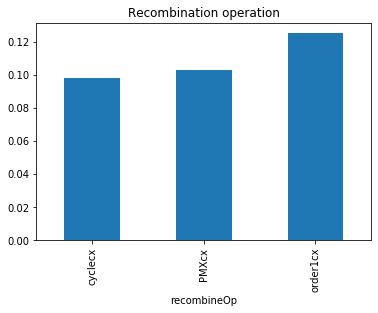

In [15]:
%matplotlib inline
tmp.groupby('recombineOp')['gap'].mean().sort_values().plot(kind='bar', title='Recombination operation')

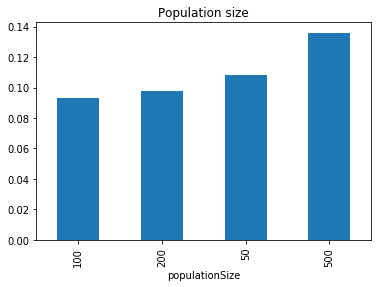

In [16]:
tmp.groupby('populationSize')['gap'].mean().sort_values().plot(kind='bar', title='Population size')

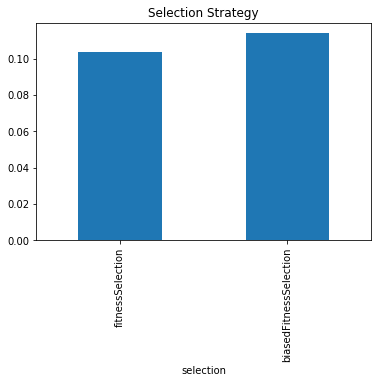

In [17]:
tmp.groupby('selection')['gap'].mean().sort_values().plot(kind='bar', title='Selection Strategy')

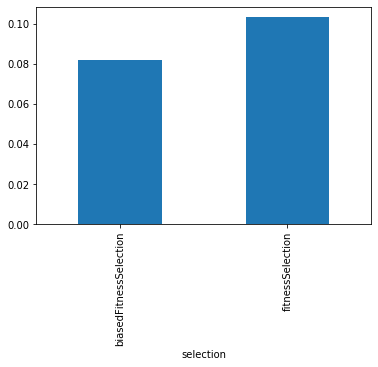

In [18]:
tmp[tmp['populationSize'] == 100].groupby('selection')['gap'].mean().plot(kind='bar')

# Local Search

In [19]:
inputfile = "..\\..\\experiments\\local_search_results.txt"
df = pd.read_csv(inputfile, sep='\t')

In [20]:
df.head()

,instance,size,seed,finalCost,executionTime,numTrials,bestKnownCost,gap
0,wil100.dat,100,1,275316,126.630,7,273038,0.008343
1,tho40.dat,40,1,244426,120.071,770,240516,0.016257
2,ste36c.dat,36,1,8330578,120.025,1060,8239110,0.011102
3,tai60b.dat,60,1,620320909,121.695,82,608215054,0.019904
4,tai80b.dat,80,1,841608362,120.634,18,818415043,0.028339


In [21]:
df.groupby('instance')[['finalCost','gap','executionTime','numTrials']].mean().head()

,finalCost,gap,executionTime,numTrials
instance,,,,
bur26a.dat,5426670.0,0.0,30.9182,1272.60
bur26e.dat,5386879.0,0.0,28.0902,1100.20
chr15a.dat,9896.0,0.0,24.4230,14815.60
chr20c.dat,14142.0,0.0,5.8500,866.25
els19.dat,17212548.0,0.0,0.6960,106.75
